In [25]:
df=pd.read_csv("zomato_orders2.csv")

In [27]:

df

,order_id,user_id,restaurant_id,order_date,order_time,order_amount,order_status,delivery_time_mins,total_orders
0,1,6925,1005,2024-02-21,16:00:00,902.11,Delivered,28,4
1,2,5274,1048,2024-04-02,20:00:00,541.96,Cancelled,28,4
2,3,6553,1036,2024-01-15,08:00:00,639.26,Delivered,21,8
3,4,6615,1027,2024-03-12,05:00:00,186.10,Delivered,12,3
4,5,5214,1029,2024-03-01,18:00:00,444.62,Delivered,27,1
...,...,...,...,...,...,...,...,...,...
4995,4996,6119,1011,2024-02-18,10:00:00,502.10,Delivered,59,5
4996,4997,5745,1010,2024-02-27,06:00:00,828.81,Delivered,47,3
4997,4998,5489,1002,2024-02-08,01:00:00,319.15,Delivered,20,6
4998,4999,5578,1043,2024-03-20,18:00:00,894.86,Delivered,14,1


/var/folders/sb/hxcxtgd548zcncz9qb48ngw80000gn/T/ipykernel_12993/3239033859.py:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = data.groupby(pd.Grouper(key='timestamp', freq='H')).agg({'total_orders': 'sum'}).reset_index()
23:39:51 - cmdstanpy - INFO - Chain [1] start processing
23:39:51 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


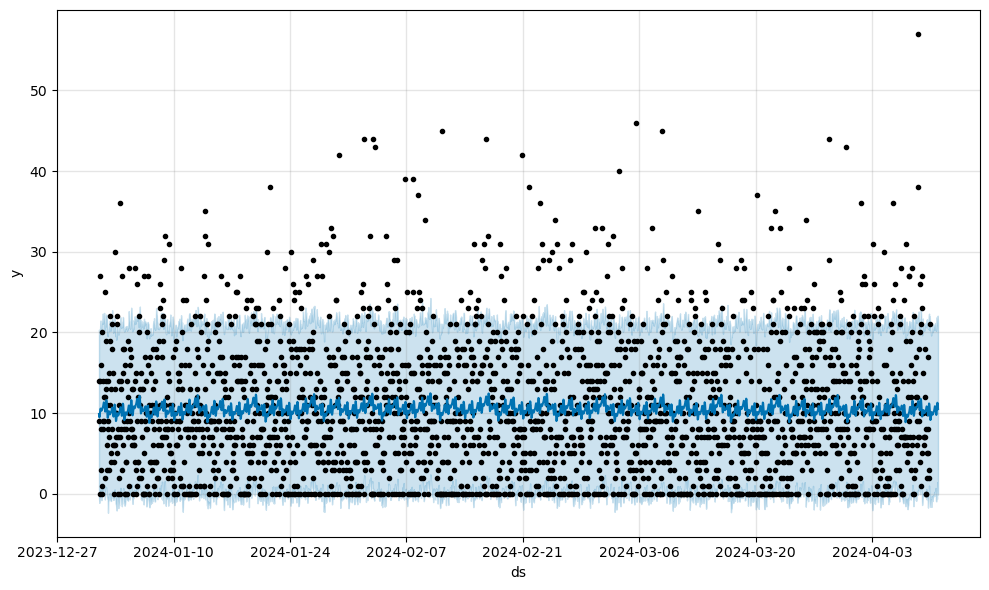

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load dataset
data = pd.read_csv("zomato_orders2.csv")

# Convert 'order_date' to datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Convert 'order_time' to datetime (ensure it has HH:MM:SS format)
data['order_time'] = pd.to_datetime(data['order_time'], format='%H:%M:%S', errors='coerce').dt.time

# Combine 'order_date' and 'order_time' into a single timestamp
data['timestamp'] = pd.to_datetime(data['order_date'].astype(str) + ' ' + data['order_time'].astype(str), errors='coerce')

# Drop any rows where timestamp conversion failed
data = data.dropna(subset=['timestamp'])

# Aggregate total orders per hour
hourly_data = data.groupby(pd.Grouper(key='timestamp', freq='H')).agg({'total_orders': 'sum'}).reset_index()

# Prepare data for Prophet
df = hourly_data[['timestamp', 'total_orders']].rename(columns={'timestamp': 'ds', 'total_orders': 'y'})

# Initialize and train Prophet model
model = Prophet()
model.fit(df)

# Create future dates for the next 24 hours
future = model.make_future_dataframe(periods=24, freq='H')

# Predict orders for the next day (hourly)
forecast = model.predict(future)

# Plot results
model.plot(forecast)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load Data
data = pd.read_csv("zomato_orders.csv")
data['order_time'] = pd.to_datetime(data['order_time'])
data.set_index('order_time', inplace=True)

# Resample data hourly
data = data.resample('H').sum()

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['total_orders']])

# Prepare data for LSTM
X, y = [], []
window_size = 6  # Using past 6 hours to predict the next hour
for i in range(len(scaled_data) - window_size):
    X.append(scaled_data[i:i+window_size])
    y.append(scaled_data[i+window_size])

X, y = np.array(X), np.array(y)

# Split Data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

# Predict next 24 hours
last_window = X_test[-1].reshape(1, window_size, 1)
prediction = model.predict(last_window)
predicted_orders = scaler.inverse_transform(prediction)

print("Predicted hourly orders for the next day:", predicted_orders)


/var/folders/sb/hxcxtgd548zcncz9qb48ngw80000gn/T/ipykernel_12993/1826418295.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = data.groupby(pd.Grouper(key='timestamp', freq='H')).agg({'total_orders': 'sum'}).reset_index()
23:51:34 - cmdstanpy - INFO - Chain [1] start processing
23:51:35 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

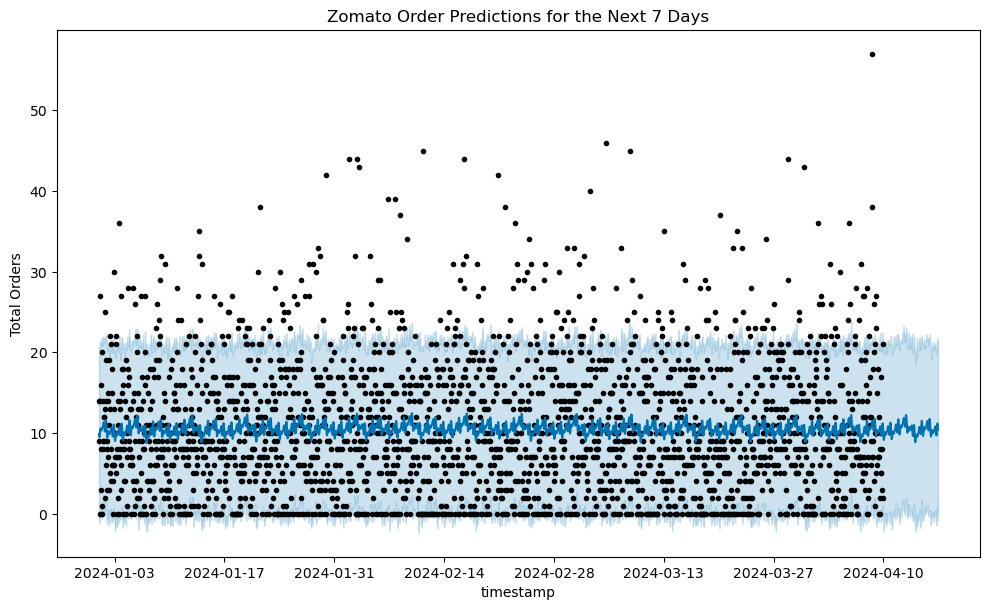

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load dataset
data = pd.read_csv("zomato_orders2.csv")

# Convert 'order_date' and 'order_time' into a full timestamp
data['order_date'] = pd.to_datetime(data['order_date'])
data['order_time'] = pd.to_datetime(data['order_time'], format='%H:%M:%S', errors='coerce').dt.time
data['timestamp'] = pd.to_datetime(data['order_date'].astype(str) + ' ' + data['order_time'].astype(str), errors='coerce')

# Drop any rows with missing timestamps
data = data.dropna(subset=['timestamp'])

# Aggregate total orders per hour
hourly_data = data.groupby(pd.Grouper(key='timestamp', freq='H')).agg({'total_orders': 'sum'}).reset_index()

# Prepare data for Prophet
df = hourly_data.rename(columns={'timestamp': 'ds', 'total_orders': 'y'})

# Initialize Prophet model with additional seasonality
model = Prophet(yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=True)
model.fit(df)

# Extend forecast to 7 days (168 hours)
future = model.make_future_dataframe(periods=168, freq='H')
forecast = model.predict(future)

# Plot results
plt.figure(figsize=(12, 6))
model.plot(forecast)
plt.title("Zomato Order Predictions for the Next 7 Days")
plt.xlabel("timestamp")
plt.ylabel("Total Orders")
plt.grid()
plt.show()



/var/folders/sb/hxcxtgd548zcncz9qb48ngw80000gn/T/ipykernel_12993/2559888936.py:24: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = data.groupby(pd.Grouper(key='timestamp', freq='H')).agg({'total_orders': 'sum'}).reset_index()
23:54:00 - cmdstanpy - INFO - Chain [1] start processing
23:54:00 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

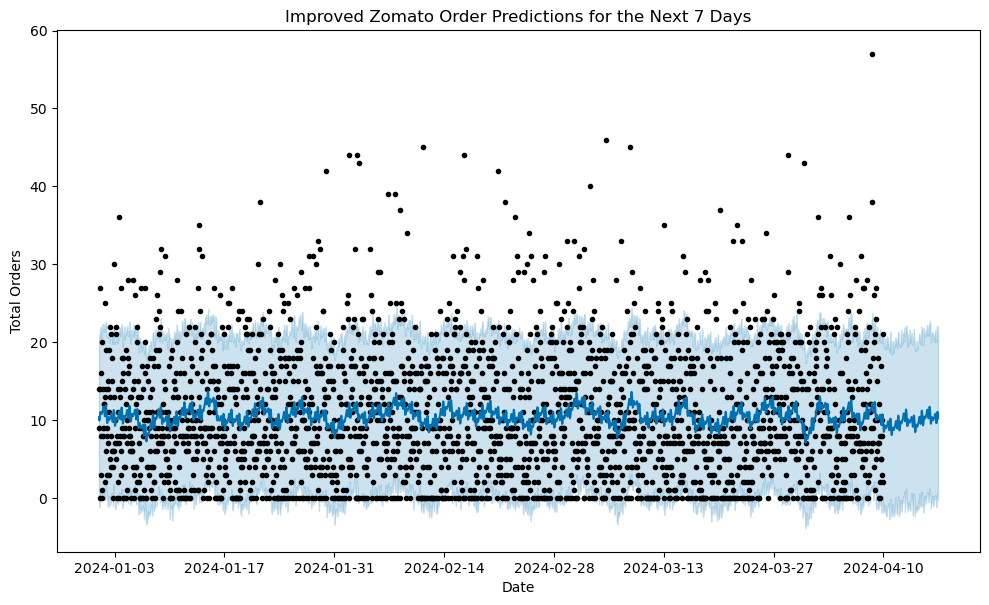

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load dataset
data = pd.read_csv("zomato_orders2.csv")

# Convert 'order_date' and 'order_time' into a full timestamp
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')

# Ensure order_time is in the correct format
data['order_time'] = pd.to_datetime(data['order_time'], format='%H:%M:%S', errors='coerce').dt.time

# Combine 'order_date' and 'order_time' into a single timestamp
data['timestamp'] = pd.to_datetime(data['order_date'].astype(str) + ' ' + data['order_time'].astype(str), errors='coerce')

# Drop missing timestamps
data = data.dropna(subset=['timestamp'])

# Check for missing or incorrect values
data = data.dropna()  # Remove any remaining NaN values

# Aggregate total orders per hour
hourly_data = data.groupby(pd.Grouper(key='timestamp', freq='H')).agg({'total_orders': 'sum'}).reset_index()

# Prepare data for Prophet
df = hourly_data.rename(columns={'timestamp': 'ds', 'total_orders': 'y'})

# Add additional features for better accuracy
df['day_of_week'] = df['ds'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['hour'] = df['ds'].dt.hour  # Extract hour

# Initialize Prophet with extra seasonalities
model = Prophet(yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=True)

# Add additional seasonalities
model.add_seasonality(name='hourly', period=24, fourier_order=8)  # Captures hourly trends

# Train the model
model.fit(df)

# Extend forecast for 7 days (168 hours)
future = model.make_future_dataframe(periods=168, freq='H')

# Predict future orders
forecast = model.predict(future)

# Plot the forecast
plt.figure(figsize=(12, 6))
model.plot(forecast)
plt.title("Improved Zomato Order Predictions for the Next 7 Days")
plt.xlabel("Date")
plt.ylabel("Total Orders")
plt.grid()
plt.show()




/var/folders/sb/hxcxtgd548zcncz9qb48ngw80000gn/T/ipykernel_12993/3821960211.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = data.groupby(pd.Grouper(key='timestamp', freq='H')).agg({'total_orders': 'sum'}).reset_index()
23:55:16 - cmdstanpy - INFO - Chain [1] start processing
23:55:16 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

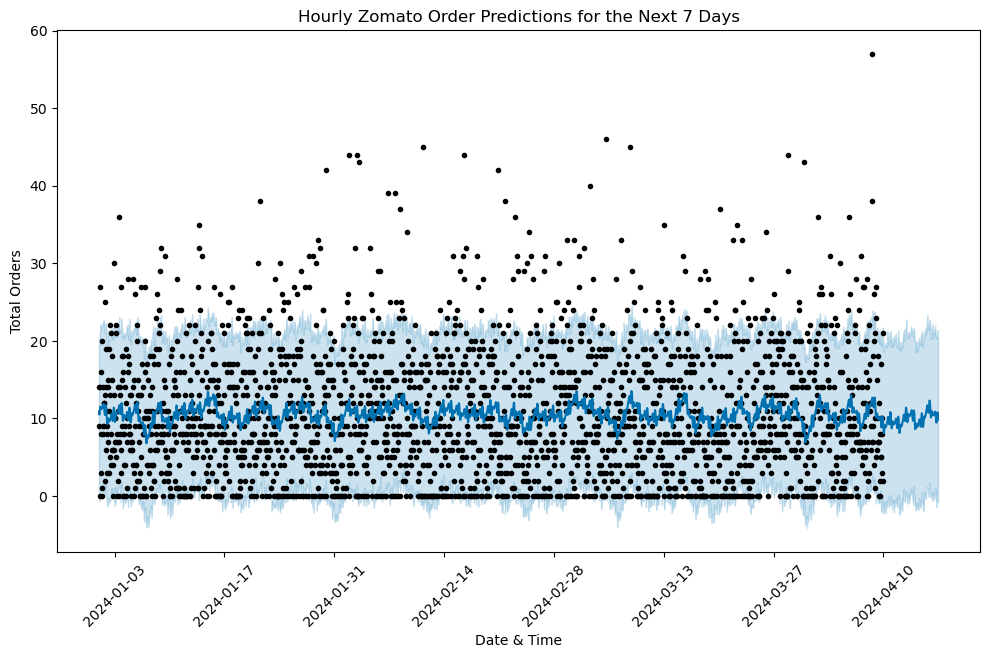

Next 24-hour order predictions:
                      ds       yhat  yhat_lower  yhat_upper
2544 2024-04-16 00:00:00  10.624080   -0.142629   21.369742
2545 2024-04-16 01:00:00  10.136495    0.169439   20.253657
2546 2024-04-16 02:00:00  10.211141   -0.309881   20.376881
2547 2024-04-16 03:00:00  10.605968    0.084647   20.515568
2548 2024-04-16 04:00:00  10.909887    0.146291   21.742677
2549 2024-04-16 05:00:00  10.897957    0.508436   21.460260
2550 2024-04-16 06:00:00  10.663764   -0.212465   22.079550
2551 2024-04-16 07:00:00  10.452637   -0.614945   20.325285
2552 2024-04-16 08:00:00  10.403150    0.265490   21.141662
2553 2024-04-16 09:00:00  10.457561   -0.083838   21.104063
2554 2024-04-16 10:00:00  10.494593   -0.359101   21.468777
2555 2024-04-16 11:00:00  10.500227    0.521924   20.877722
2556 2024-04-16 12:00:00  10.570688   -0.097040   21.258057
2557 2024-04-16 13:00:00  10.747771    0.345971   21.488755
2558 2024-04-16 14:00:00  10.891020    1.036105   21.946628
2559 202

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load dataset
data = pd.read_csv("zomato_orders2.csv")

# Convert 'order_date' and 'order_time' into a full timestamp
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')
data['order_time'] = pd.to_datetime(data['order_time'], format='%H:%M:%S', errors='coerce').dt.time

# Combine date & time into full timestamp
data['timestamp'] = pd.to_datetime(data['order_date'].astype(str) + ' ' + data['order_time'].astype(str), errors='coerce')

# Drop missing timestamps
data = data.dropna(subset=['timestamp'])

# Aggregate orders per hour
hourly_data = data.groupby(pd.Grouper(key='timestamp', freq='H')).agg({'total_orders': 'sum'}).reset_index()

# Prophet requires column names 'ds' for datetime and 'y' for target variable
df = hourly_data.rename(columns={'timestamp': 'ds', 'total_orders': 'y'})

# Ensure data is sorted by time
df = df.sort_values(by='ds')

# Initialize Prophet model with hourly seasonality
model = Prophet(yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=True)
model.add_seasonality(name='hourly', period=24, fourier_order=10)  # Add strong hourly patterns

# Fit the model
model.fit(df)

# Create a future dataframe for the next 7 days (hourly level)
future = model.make_future_dataframe(periods=168, freq='H')  # 7 days * 24 hours

# Predict orders
forecast = model.predict(future)

# Plot the forecast
plt.figure(figsize=(12, 6))
model.plot(forecast)
plt.title("Hourly Zomato Order Predictions for the Next 7 Days")
plt.xlabel("Date & Time")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Show only the next 24-hour predictions
print("Next 24-hour order predictions:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24))


/var/folders/sb/hxcxtgd548zcncz9qb48ngw80000gn/T/ipykernel_12993/1524359166.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = data.groupby(pd.Grouper(key='timestamp', freq='H')).agg({'total_orders': 'sum'}).reset_index()
23:57:27 - cmdstanpy - INFO - Chain [1] start processing
23:57:27 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

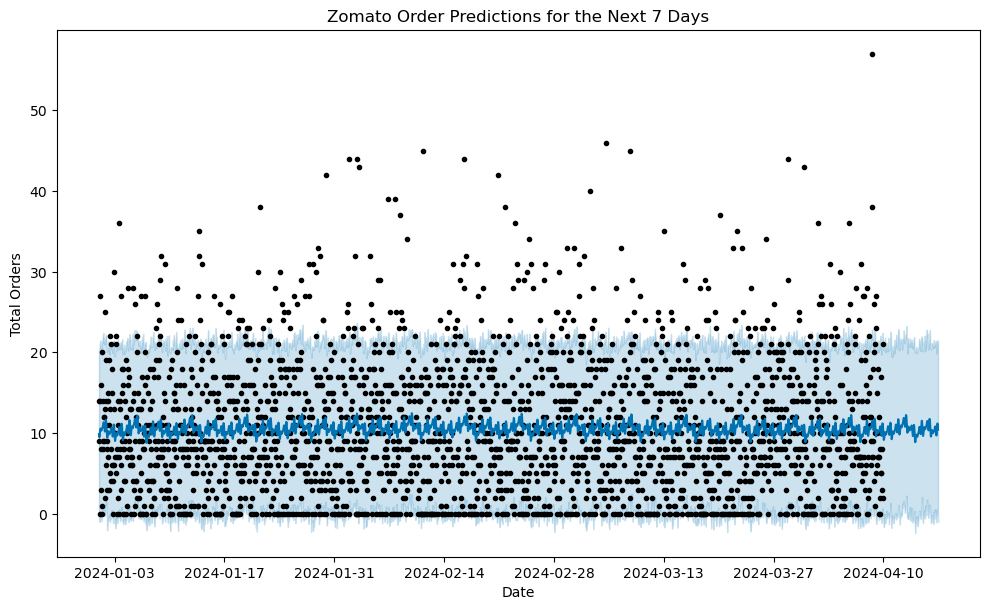

                      ds       yhat  yhat_lower  yhat_upper
2400 2024-04-10 00:00:00   9.588930   -0.973953   20.481804
2401 2024-04-10 01:00:00   9.145896   -1.652060   20.257355
2402 2024-04-10 02:00:00   9.263817   -1.465672   20.355884
2403 2024-04-10 03:00:00   9.703292   -1.100632   20.630685
2404 2024-04-10 04:00:00  10.059494   -0.021353   20.479955
...                  ...        ...         ...         ...
2563 2024-04-16 19:00:00  10.035699   -0.219368   21.131365
2564 2024-04-16 20:00:00  10.703452   -0.142198   21.038404
2565 2024-04-16 21:00:00  11.194182    0.433454   21.518746
2566 2024-04-16 22:00:00  11.087853    0.584864   21.467473
2567 2024-04-16 23:00:00  10.401818   -1.000793   21.101864

[168 rows x 4 columns]


In [62]:

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load dataset
data = pd.read_csv("zomato_orders2.csv")

# Convert 'order_date' and 'order_time' into a timestamp
data['order_date'] = pd.to_datetime(data['order_date'])
data['order_time'] = pd.to_datetime(data['order_time'], format='%H:%M:%S', errors='coerce').dt.time
data['timestamp'] = pd.to_datetime(data['order_date'].astype(str) + ' ' + data['order_time'].astype(str), errors='coerce')

# Drop any rows with missing timestamps
data = data.dropna(subset=['timestamp'])

# Aggregate total orders per hour
hourly_data = data.groupby(pd.Grouper(key='timestamp', freq='H')).agg({'total_orders': 'sum'}).reset_index()

# Prepare data for Prophet
df = hourly_data.rename(columns={'timestamp': 'ds', 'total_orders': 'y'})

# Initialize Prophet model with weekly & daily seasonality
model = Prophet(yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=True)
model.fit(df)

# Create future dataframe for 7 days (168 hours)
future = model.make_future_dataframe(periods=168, freq='H')
forecast = model.predict(future)

# Plot results
plt.figure(figsize=(12, 6))
model.plot(forecast)
plt.title("Zomato Order Predictions for the Next 7 Days")
plt.xlabel("Date")
plt.ylabel("Total Orders")
plt.grid()
plt.show()

# Show next 7 days of predictions
weekly_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(168)
print(weekly_forecast)
